In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from collections import Counter

C:\Users\SAI\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
!pip install split-folders

In [3]:
import splitfolders

data_dir = r'C:\Users\SAI\Downloads\archive (4)\Driver Drowsiness Dataset (DDD)'
output_dir = '/kaggle/working/splitted_Data'
splitfolders.ratio(data_dir, output=output_dir, seed=1337, ratio=(.8, 0.15, 0.05))

Copying files: 41793 files [06:06, 114.02 files/s]


In [4]:
train_dir = "/kaggle/working/splitted_Data/train"
test_dir = "/kaggle/working/splitted_Data/test"
val_dir = "/kaggle/working/splitted_Data/val"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_batches = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 33434 images belonging to 2 classes.


In [7]:
test_batches = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary' ,
    shuffle=True
)

Found 2091 images belonging to 2 classes.


In [8]:
val_batches = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 6268 images belonging to 2 classes.


In [9]:
train_class_indices = train_batches.class_indices
test_class_indices = test_batches.class_indices
val_class_indices = val_batches.class_indices

train_class_labels = train_batches.classes
test_class_labels = test_batches.classes
val_class_labels = val_batches.classes


train_class_counts = Counter(train_class_labels)
test_class_counts = Counter(test_class_labels)
val_class_counts = Counter(val_class_labels)

print("Class Names for train:\n", train_class_indices)
print("Class Counts for train:\n", train_class_counts)
print(end='\n')

print("Class Names for test:\n", test_class_indices)
print("Class Counts for test:\n", test_class_counts)
print(end='\n')

print("Class Names for validation :\n", val_class_indices)
print("Class Counts for validation:\n", val_class_counts)

Class Names for train:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for train:
 Counter({0: 17878, 1: 15556})

Class Names for test:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for test:
 Counter({0: 1118, 1: 973})

Class Names for validation :
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for validation:
 Counter({0: 3352, 1: 2916})


Pixels of the first image after Normalization: 

[[[0.7725491  0.7254902  0.6431373 ]
  [0.7725491  0.7254902  0.6431373 ]
  [0.7686275  0.7176471  0.63529414]
  ...
  [0.2627451  0.19607845 0.14117648]
  [0.2784314  0.20784315 0.15294118]
  [0.33333334 0.25490198 0.18823531]]

 [[0.7725491  0.7254902  0.6431373 ]
  [0.7725491  0.7254902  0.6431373 ]
  [0.7686275  0.7176471  0.63529414]
  ...
  [0.2627451  0.19607845 0.14117648]
  [0.2784314  0.20784315 0.15294118]
  [0.30980393 0.23529413 0.17254902]]

 [[0.7725491  0.7254902  0.6431373 ]
  [0.7725491  0.7254902  0.6431373 ]
  [0.7686275  0.7176471  0.63529414]
  ...
  [0.2784314  0.20000002 0.14901961]
  [0.29803923 0.21176472 0.16470589]
  [0.3254902  0.24313727 0.18431373]]

 ...

 [[0.8196079  0.74509805 0.73333335]
  [0.81568635 0.74509805 0.73333335]
  [0.81568635 0.74509805 0.73333335]
  ...
  [0.52156866 0.46274513 0.5058824 ]
  [0.5176471  0.45882356 0.5019608 ]
  [0.5254902  0.4666667  0.50980395]]

 [[0.82745105 0.75294125 

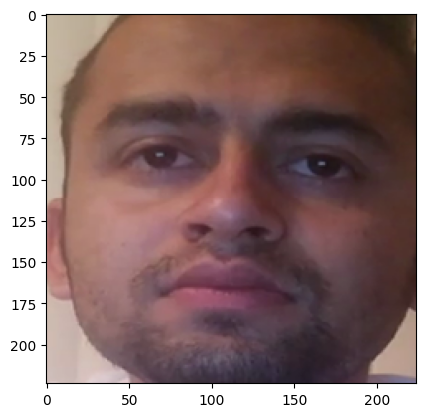

In [10]:
images, labels = next(train_batches)
print(f"Pixels of the first image after Normalization: \n\n{images[0]}") #print pixels of the first img
plt.imshow(images[0])
plt.show()

In [11]:
print(f"there are { images[0].ndim} Channels ")
print(f"image shape : {images[0].shape}")


there are 3 Channels 
image shape : (224, 224, 3)


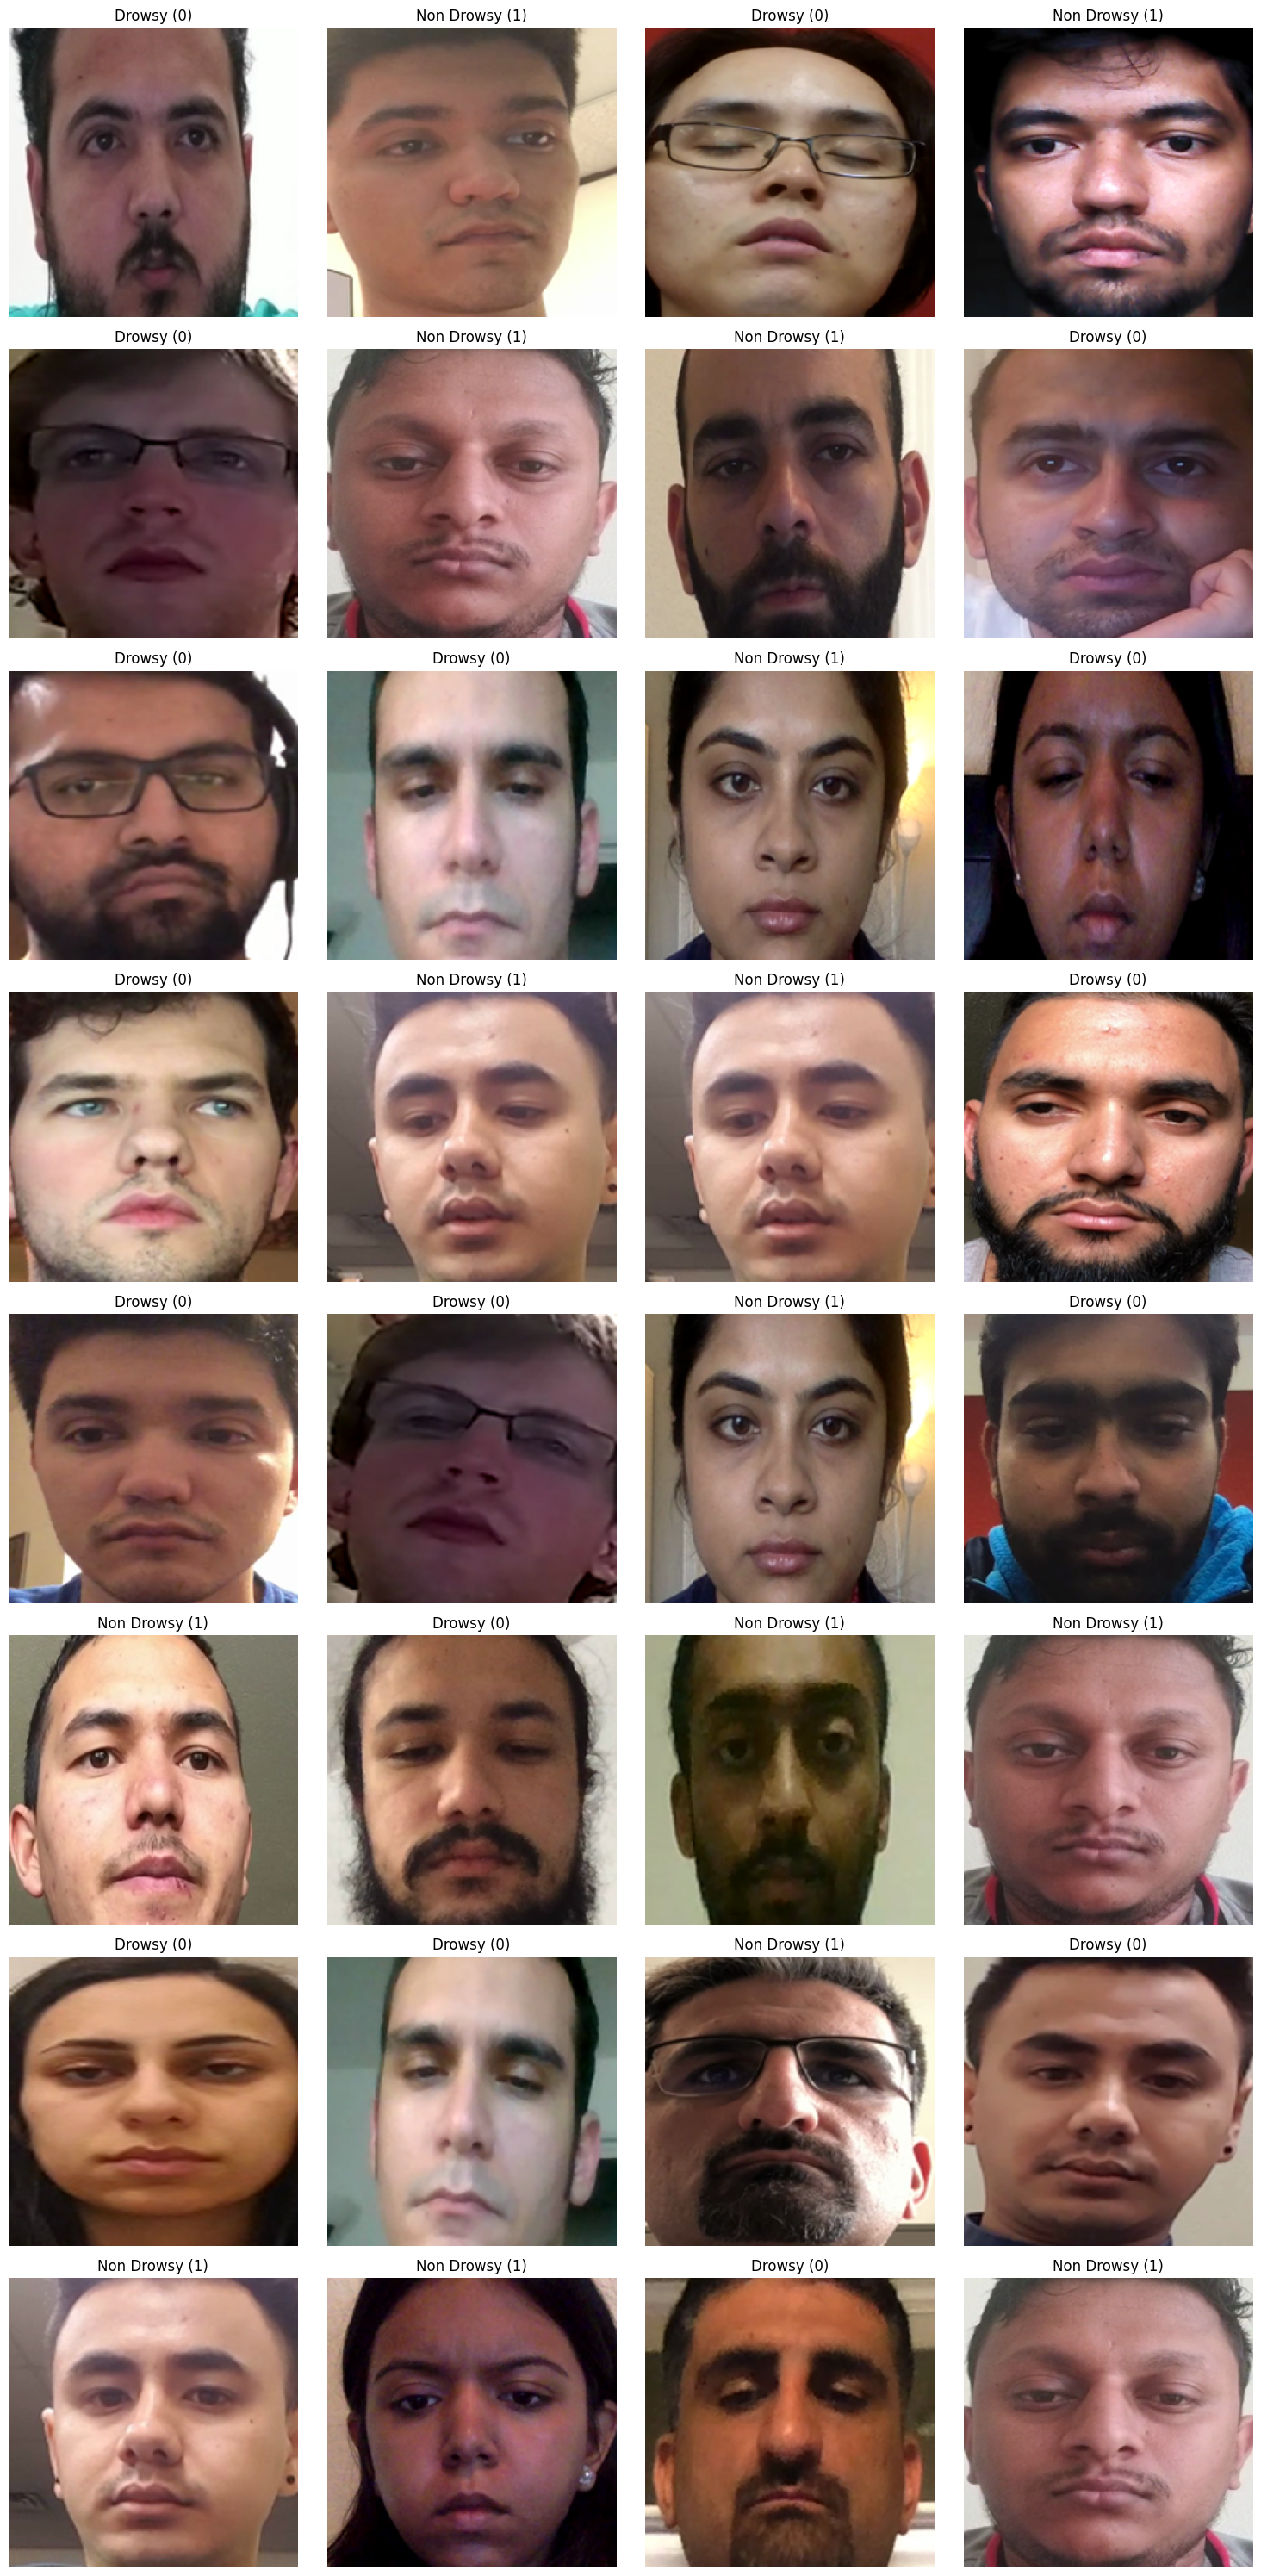

In [12]:
fig, axes = plt.subplots(8, 4, figsize=(15, 30))
class_indices = train_batches.class_indices

for i in range(8):
    images, labels = next(train_batches)
    for j in range(4):
        
        ax = axes[i, j]
        ax.imshow(images[j])
        ax.axis('off')
        label = int(labels[j])  
        label_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        ax.set_title(f'{label_name} ({label})')

plt.tight_layout()
plt.show()

In [14]:
from tensorflow.keras.applications import MobileNetV2

# Define the image size
image_size = (224, 224)  # Example size, adjust according to your dataset

# Create the base model
base_model = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(image_size[0], image_size[1], 3),
)


In [15]:
type(base_model)

keras.src.engine.functional.Functional

In [16]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [17]:
model=keras.Sequential() #empty

In [18]:
for layer in base_model.layers[:-25] :
    layer.trainable = False

In [19]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [20]:
model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [23]:
model.compile(optimizer=Adam(0.0001 ), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
   train_batches,
    epochs=5,
    validation_data=val_batches,
    batch_size=32
)

Epoch 1/5


2090/2090 [==============================] - 2375s 1s/step - loss: 0.0281 - accuracy: 0.9930 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/5
2090/2090 [==============================] - 2178s 1s/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 3/5
2090/2090 [==============================] - 2180s 1s/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 4/5
2090/2090 [==============================] - 2195s 1s/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 2.0466e-04 - val_accuracy: 1.0000
Epoch 5/5
2090/2090 [==============================] - 2175s 1s/step - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9998


In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
loss, accuracy = model.evaluate(train_batches)

print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

2090/2090 [==============================] - 498s 238ms/step - loss: 4.5406e-04 - accuracy: 0.9999
Training Loss: 0.0005
Training Accuracy: 99.99%


In [27]:
loss, accuracy = model.evaluate(test_batches)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

131/131 [==============================] - 44s 336ms/step - loss: 0.0164 - accuracy: 0.9995
Test Loss: 0.0164
Test Accuracy: 99.95%


In [28]:
y_pred = model.predict(test_batches)

y_pred_labels = np.argmax(y_pred, axis=1)

131/131 [==============================] - 32s 235ms/step


In [29]:
y_actual = test_batches.labels

In [30]:
conf_matrix = confusion_matrix(y_actual, y_pred_labels)

print(conf_matrix)

[[597 521]
 [520 453]]


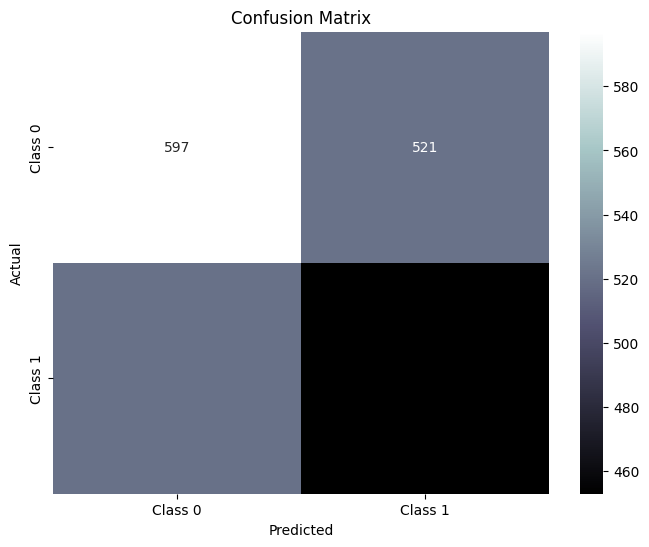

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
report = classification_report(y_actual, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1118
           1       0.47      0.47      0.47       973

    accuracy                           0.50      2091
   macro avg       0.50      0.50      0.50      2091
weighted avg       0.50      0.50      0.50      2091



In [42]:
model.save('driver_drowsiness_detection.h5')

C:\Users\SAI\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

# Load the model
model = load_model('driver_drowsiness_detection.h5')

# Class indices mapping
class_indices = {0: 'Drowsy', 1: 'Not Drowsy'}  # Update with your actual class names

# Preprocess image function
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale
    return img_array

# Preprocess frame function
def preprocess_frame(frame, target_size=(224, 224)):
    frame = cv2.resize(frame, target_size)
    frame = frame.astype('float32') / 255.0
    frame = np.expand_dims(frame, axis=0)
    return frame

# Predict on new image
img_path = r"C:\Users\SAI\Desktop\test1.webp"
preprocessed_image = preprocess_image(img_path)
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)
predicted_class_name = class_indices[predicted_class[0]]
print(f"Predicted class: {predicted_class_name}")
# Predict on video with batch processing
def predict_on_video(video_path, model, batch_size=32):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    frames = []
    predictions = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        preprocessed_frame = preprocess_frame(frame)
        frames.append(preprocessed_frame)

        # Process batch
        if len(frames) == batch_size:
            batch_predictions = model.predict(np.array(frames))
            predicted_classes = np.argmax(batch_predictions, axis=1)
            predictions.extend(predicted_classes)
            frames = []  # Reset frames list

        # Display the frame with prediction
        class_name = class_indices[predicted_classes[-1]]
        cv2.putText(frame, class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Frame', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Process any remaining frames
    if frames:
        batch_predictions = model.predict(np.array(frames))
        predicted_classes = np.argmax(batch_predictions, axis=1)
        predictions.extend(predicted_classes)

    cap.release()
    cv2.destroyAllWindows()
    return predictions

# Example of predicting on a video
video_path = 'path_to_your_video.mp4'
predictions = predict_on_video(video_path, model)
print(predictions)

1/1 [==============================] - 2s 2s/step
Predicted class: Drowsy


In [46]:
import numpy as np
import time
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
start_time = time.time()
model = load_model('driver_drowsiness_detection.h5')
print(f"Model loading time: {time.time() - start_time:.2f} seconds")

# Class indices mapping
class_indices = {0: 'drowsy', 1: 'not drowsy'}  # Update with your actual class names

# Preprocess image function
def preprocess_image(img_path, target_size=(224, 224)):
    start_time = time.time()
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale
    print(f"Image preprocessing time: {time.time() - start_time:.2f} seconds")
    return img_array

# Example of loading and preprocessing a new image
img_path = r'C:\Users\SAI\Desktop\test1.webp'
preprocessed_image = preprocess_image(img_path)

# Predict the class of the new image
start_time = time.time()
prediction = model.predict(preprocessed_image)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")

predicted_class = np.argmax(prediction, axis=1)
predicted_class_name = class_indices[predicted_class[0]]
print(f"Predicted class: {predicted_class_name}")


Model loading time: 5.19 seconds
Image preprocessing time: 0.05 seconds


1/1 [==============================] - 1s 1s/step
Prediction time: 1.55 seconds
Predicted class: drowsy


C:\Users\SAI\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "




Model loading time: 5.55 seconds
Image preprocessing time: 0.03 seconds
1/1 [==============================] - 1s 1s/step
Prediction time: 1.59 seconds
Predicted class: not drowsy


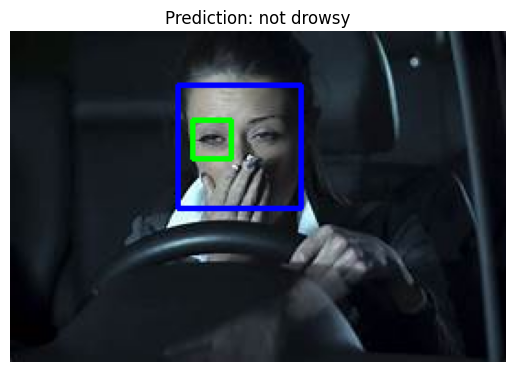

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time
from tensorflow.keras.preprocessing import image as keras_image

# Load the pre-trained model for drowsiness detection
start_time = time.time()
model = load_model('driver_drowsiness_detection.h5')
print(f"Model loading time: {time.time() - start_time:.2f} seconds")

# Class indices mapping
class_indices = {0: 'drowsy', 1: 'not drowsy'}  # Update with your actual class names

# Preprocess image function
def preprocess_image(img_path, target_size=(224, 224)):
    start_time = time.time()
    img = keras_image.load_img(img_path, target_size=target_size)
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale
    print(f"Image preprocessing time: {time.time() - start_time:.2f} seconds")
    return img_array

# Load the Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_face_and_eyes(image):
    # Convert the image to grayscale for face and eye detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes detection within the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        # Detect eyes within the face
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Filter out false positives by size and position within the face
        for (ex, ey, ew, eh) in eyes:
            # Condition to filter out false positives (e.g., nose)
            if ey < h / 2:  # Only consider eyes in the upper half of the face
                # Draw rectangle around each eye
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    return image

# Function to display the image with face and eye detections
def display_image_with_detections(img_path):
    image = cv2.imread(img_path)
    image_with_detections = detect_face_and_eyes(image)
    return image_with_detections

# Example of loading and preprocessing a new image
img_path = r"C:\Users\SAI\Desktop\t3.jpeg"
preprocessed_image = preprocess_image(img_path)

# Predict the class of the new image
start_time = time.time()
prediction = model.predict(preprocessed_image)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")

predicted_class = np.argmax(prediction, axis=1)
predicted_class_name = class_indices[predicted_class[0]]
print(f"Predicted class: {predicted_class_name}")

# Display the image with detections
result_image = display_image_with_detections(img_path)

# Convert the result image from BGR to RGB for matplotlib display
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result image using matplotlib
plt.imshow(result_image_rgb)
plt.axis('off')  # Hide axes ticks
plt.title(f'Prediction: {predicted_class_name}')
plt.show()


In [1]:
!pip uninstall opencv-python -y

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84


In [2]:
!pip uninstall opencv-python-headless -y

In [3]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [7]:
import cv2
import numpy as np
from collections import deque

# Load the Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_pupil(eye_region):
    gray_eye = cv2.cvtColor(eye_region, cv2.COLOR_BGR2GRAY)
    blurred_eye = cv2.GaussianBlur(gray_eye, (7, 7), 0)
    
    # Adaptive thresholding for better pupil detection
    thresh_eye = cv2.adaptiveThreshold(blurred_eye, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours to detect pupils
    contours, _ = cv2.findContours(thresh_eye, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        if 50 < cv2.contourArea(largest_contour) < 500:  # Filter out very small and very large contours
            x, y, w, h = cv2.boundingRect(largest_contour)
            cv2.rectangle(eye_region, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.drawContours(eye_region, [largest_contour], -1, (0, 255, 0), 2)
            return True
    return False

def detect_face_and_eyes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    eyes_closed = False

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes detection within the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        # Detect eyes within the face
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        eyes_closed_in_frame = True
        
        for (ex, ey, ew, eh) in eyes:
            if ey < h / 2:  # Only consider eyes in the upper half of the face
                # Draw rectangle around each eye
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

                # Extract the eye region for further processing
                eye_region = roi_color[ey:ey+eh, ex:ex+ew]
                
                # Detect pupil
                pupil_detected = detect_pupil(eye_region)
                
                # Check if pupil is detected
                if pupil_detected:
                    eyes_closed_in_frame = False
                    cv2.putText(roi_color, 'open', (ex, ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        if eyes_closed_in_frame:
            eyes_closed = True

    return eyes_closed

# Start video capture from webcam
cap = cv2.VideoCapture(0)  # 0 for the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Buffer to track eye state over time
buffer_size = 25  # Buffer size set to 8 frames
eye_state_buffer = deque(maxlen=buffer_size)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    eyes_closed = detect_face_and_eyes(frame)

    # Add current eye state to the buffer
    eye_state_buffer.append(eyes_closed)

    # Debugging: Print buffer contents and current eye state
    print(f"Current Eye State: {'Closed' if eyes_closed else 'Open'}")
    print(f"Eye State Buffer: {list(eye_state_buffer)}")

    # Determine overall drowsiness state based on buffer
    if len(eye_state_buffer) == buffer_size and all(eye_state_buffer):
        final_prediction = 'Drowsy'
    else:
        final_prediction = 'Not Drowsy'
    
    # Overlay the prediction label on the image
    cv2.putText(frame, f'Prediction: {final_prediction}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Drowsiness Detection', frame)

    # Write the frame to the output video file
    out.write(frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print("Live camera feed ended and output video saved.")


Current Eye State: Open
Eye State Buffer: [False]
Current Eye State: Closed
Eye State Buffer: [False, True]
Current Eye State: Open
Eye State Buffer: [False, True, False]
Current Eye State: Closed
Eye State Buffer: [False, True, False, True]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False]
Current Eye State: Closed
Eye State Buffer: [False, True, False, True, False, True]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False, True, False]
Current Eye State: Closed
Eye State Buffer: [False, True, False, True, False, True, False, True]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False, True, False, True, False]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False, True, False, True, False, False]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False, True, False, True, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, True, False, True, False, True, Fal

Current Eye State: Open
Eye State Buffer: [True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False]
Current Eye State: Closed
Eye State Buffer: [True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True]
Current Eye State: Closed
Eye State Buffer: [True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, True]
Current Eye State: Closed
Eye State Buffer: [False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, Fal

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True]
Current Eye State: O

Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, Fals

Current Eye State: Closed
Eye State Buffer: [False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True]
Current Eye State: Open
Eye State Buffer: [True, True, True, False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False]
Current Eye State: Closed
Eye State Buffer: [True, True, False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, True]
Current Eye State: Closed
Eye State Buffer: [True, False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, True, True]
Current Eye State: Open
Eye State Buffer: [False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, Fa

Current Eye State: Open
Eye State Buffer: [False, True, True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Closed
Eye State Buffer: [True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, Fa

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed

Current Eye State: Open
Eye State Buffer: [True, True, False, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, Fals

Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False

Current Eye State: Open
Eye State Buffer: [False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, Fal

Current Eye State: Open
Eye State Buffer: [True, False, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed

Current Eye State: Closed
Eye State Buffer: [True, True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
Current Eye State: Closed
Eye State Buffer: [True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]
Current Eye State: Open
Eye State Buffer: [False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False]
Current Eye State: Open
Eye State Buffer: [False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False,

Current Eye State: Closed
Eye State Buffer: [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Close

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, Tr

Current Eye State: Open
Eye State Buffer: [False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, 

Current Eye State: Open
Eye State Buffer: [False, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False

Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True, True, True]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, 

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True]
Current Eye State: Close

Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, True, True, False, False, False, False, False, False, 

Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True,

Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Current Eye State: Closed

Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
Current Eye State: Closed
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, False, False, False, False, False, False, False, False, False, False, Fals

Current Eye State: Open
Eye State Buffer: [True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, False]
Current Eye State: Closed
Eye State Buffer: [False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, False, True]
Current Eye State: Open
Eye State Buffer: [True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, False, True, False]
Current Eye State: Open
Eye State Buffer: [True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, False, True, False, False]
Current Eye State: Open
Eye State Buffer: [False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, False, True, False, Fals

Current Eye State: Open
Eye State Buffer: [False, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False]
Current Eye State: Closed
Eye State Buffer: [True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True]
Current Eye State: Closed
Eye State Buffer: [True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, True]
Current Eye State: Closed
Eye State Buffer: [True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, True, True]
Current Eye State: Closed
Eye State Buffer: [True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False,

Current Eye State: Closed
Eye State Buffer: [False, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True]
Current Eye State: Open
Eye State Buffer: [True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False]
Current Eye State: Open
Eye State Buffer: [True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, False]
Current Eye State: Open
Eye State Buffer: [True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, False, False]
Current Eye State: Open
Eye State Buffer: [True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, False